# The Simple Regression Model
In the previous section, we explored using a stright-line to capture the relationship in the data. In doing so, we were getting very close to formalising these ideas in terms of a statistical model. In this section, we will complete this formalisation by placing simple regression within the framework we discussed last week.

## The Normal Probability Model
To begin, we will work through all the elements of a statistical model we discussed last week, indicating how these are defined in a typical simple regression model.

### (1) The Population Distribution
The starting point for a simple regression model is to assume that the population distribition is *normal*. This implies that whatever outcome variable we have, it can be conceptualised as a *continuous random variable* drawn from a normal distribution with some mean and some variance. In symbols, we therefore have 

$$
y_{i} \sim \mathcal{N}\left(\mu_{i},\sigma^{2}_{i}\right).
$$

The reason for using the normal distribution is simply because it is *useful* from a mathematical perspective. There are certain derivations relied on later that depend upon the assumption of normality. Importantly, these are mathematically *tractable* which, in other words, simply means that you do not get stuck when trying to work them out. In the past, in a world without computers, decisions needed to be made that allowed calculations to be (a) completed and (b) simple. The normal distribution achieves both of these aims. As such, this choice is largely historical. We will see more advanced methods that do not assume this later in the course. 

### (2) The Mean Function
Next, we need to define what form the expected value of the normal distribution will take. Because simple regression problems have only *one* predictor variable, we therefore wish to define $E(y|x)$. In other words, we define an equation for the *mean* of the population disribution and how this can change with different values of $x$. 

As discussed in the previous section, for a simple regression model, the mean is defined as a point on a *straight-line*. Previously this was given as $E(y) = mx + b$. However, we use a slightly different notation for regression models:

$$
E\left(y_{i}|x_{i}\right) = \beta_{0} + \beta_{1}x_{i}.
$$

This is functionally identical to the traditional notation, we have just renamed $b \rightarrow \beta_{0}$, $m \rightarrow \beta_{1}$ and have changed the order of the terms in the sum. The reason for this is that it is useful to group the parameters together under the same name, rather than separating them out into $m$ and $b$. This renaming also adheres to the general approach of using Greek letters[^greekfoot] for parameters and Roman letters for variables. In addition, when we come to *multiple* regression, this naming scheme is practical because we can expand the number of $\beta$ terms as far as we want, without having to come up with new letters for every additional variable we have in the model. Placing the *intercept* at the start of the sum is simply convention, but makes sense if we want to think of this as our *starting point*.

### (3) The Variance Function
Finally, to complete the model, we need to define the variance function. As indicated last week, this gives the form that we assume $\text{Var}\left(y|x\right)$ takes. In other words, we define an equation for the *width* of the population disribution and how this can change with different values of $x$.

For a simple regression model, the variance function takes on a very simplistic form:

$$
\text{Var}\left(y_{i}|x_{i}\right) = \sigma^{2}.
$$

As such, irrespective of the value of $x$, the variance is assumed to be *the same*. This means that the width of the population distribution is *fixed* and does not shift. This is largely a simplifying assumption to make the model more tractable. As mentioned previously, many of the decisions around the forms that statistical models take are both historical and practical. In an age before computers, solutions needed to be calculated manually, meaning that these models needed to be as simple as possible to work with and solvable. Assuming a constant variance allows for both of these conditions to be met and a solution to be found.

`````{admonition} Occam's Razor
:class: tip
Also known as "The Law of Parsimony", Occam's Razor is a *heuristic* that we use to guide the development of statistical models. Named after [William of Ockham](https://en.wikipedia.org/wiki/William_of_Ockham), the "razor" is a metaphorical device used to "shave off" excessive and unnecessary complexity to try and build the simplest model we can. In effect, we want our models to only be as complex as they need to be, but no more. In adhering to this principle, we therefore start with the simplest model we can and then only add complexity if it is needed. Simple regression is a good example of this. We start with the most basic explanation we can: a straight line with constant variance. Only if there is evidence that this does not work would we need to examine how this should be changed. In general, this is the method for building models that you need to learn. Start simple. Assess the fit. Add complexity as needed.
`````

### The Complete Model

Using our general framework, we have:

$$
\begin{align*}
    y_{i}          &\sim \mathcal{N}\left(\mu_{i},\sigma^{2}_{i}\right) \\
    \mu_{i}        &= \beta_{0} + \beta_{1}x_{i} \\
    \sigma^{2}_{i} &= \sigma^{2}
\end{align*}
$$

Given that the variance term is constant over all values of $y$, we can simpify this to:

$$
\begin{align*}
    y_{i}   &\sim \mathcal{N}\left(\mu_{i},\sigma^{2}\right) \\
    \mu_{i} &= \beta_{0} + \beta_{1}x_{i},
\end{align*}
$$

which makes it clearer that the only element that changes across different of $y$ and $x$ values is the *mean*. We can also further simplify this expression by collapsing the mean function into the notation for the normal distribution, giving:

$$
y_{i} \sim \mathcal{N}\left(\beta_{0} + \beta_{1}x_{i},\sigma^{2}\right).
$$

Remembering from last week that we can separate $y$ into its expectation and errors, we can also express this model as:

$$
\begin{align*}
    y_{i}   &= \beta_{0} + \beta_{1}x_{i} + \epsilon_{i} \\
    \epsilon_{i} &\sim \mathcal{N}\left(0,\sigma^{2}\right),
\end{align*}
$$

which is a form you will often seen in textbooks and the literature.

Irrespective of how it is written, all the forms above imply *the same model*. We can visualise this below as we did last week, using the `mtcars` data. Make sure you spend some time moving this visualisation around and thinking about how it connects with all the different ways of writing the model given above. Remember as well that the distributions visualised here are just *examples* for a selection of Weight values. The model itself implies a normal distribution for *every possible value of Weight*. However, visualising this would result in a uninterpretable mess.

In [32]:
library(rgl)

# Data
data('mtcars')
n      <- length(mtcars$mpg)
wt.mod <- lm(mpg ~ wt, data=mtcars)

# Open 3D window
open3d()

# Set the desired ranges
xlim <- c(min(mtcars$wt),max(mtcars$wt))
ylim <- c(0,50)
zlim <- c(0,.5)

# Plot invisible points to define the bounds
plot3d(NA, xlim=xlim, ylim=ylim, zlim=zlim,
       type="n", axes=FALSE, xlab="", ylab="", zlab="")

# Plot the 3D scatter plot
points3d(mtcars$wt, mtcars$mpg, rep(0,n), col="red", size=5)

# Regression line
pred <- predict(wt.mod,newdata=data.frame("wt"=c(min(mtcars$wt),max(mtcars$wt))))
lines3d(xlim,c(pred[1],pred[2]),c(0,0), lwd=2)

# Overlay the 1D normal distribution curves
n.norms <- seq(xlim[1],xlim[2],length.out=7)
for (i in seq(1,length(n.norms))){
   # Model data
   x.val   <- n.norms[i]
   beta    <- coef(wt.mod)
   mu      <- beta[1] + beta[2]*x.val
   sigma   <- summary(wt.mod)$sigma
   
   # Curve data
   y_curve <- seq(ylim[1], ylim[2], length.out=200)
   x_curve <- rep(x.val, length(y_curve))
   z_curve <- dnorm(y_curve, mean=mu, sd=sigma)
   
   # Normal curve
   lines3d(x_curve, y_curve, z_curve, col="blue", lwd=3)
   
   # Mean line
   lines3d(c(x.val,x.val), c(mu,mu), c(0,max(z_curve)), lwd=2, col="green3")
}
 
# Add axes and grid
axes3d(edges=c("x--","y--"), col="black")
grid3d(c("z"), col="gray")

# Add axis labels
mtext3d("Weight", edge = "x--", line = 3)
mtext3d("MPG", edge = "y--", line = 3)
 
# Adjust the viewport
mat       <- par3d("userMatrix")
nmat      <- mat
nmat[2,4] <- mat[2,4] + 15  # Move 10 along y
 
# Apply the new matrix to shift the camera
par3d(userMatrix=nmat)
 
# Zoom in
par3d(zoom=0.45)

glX 
  1 

Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”


In [33]:
rglwidget(width=772)

HTML widgets cannot be represented in plain text (need html)

## Linear Models
The simple regression model described above is an example of a *linear model*. These are a special class of statistical model that have a very specific mean function. Mathematically, the distinction between something being *linear* and something being *nonlinear* comes down to issues of simplification and ease of finding a solution. This is because linear equations are easier to work with and understand compared to nonlinear. For our purpose, we do not need to understand this distinction in any deep way. The main point is that for the mean function to be linear each parameter (e.g. $\beta_{1}$, $\beta_{2}$ etc.): 

- Appears in the equation only to the first power 
- Is not divided by another parameter or variable
- Is not inside a function like a sine, exponential, or logarithm

The simple regression model meets these criteria, but the following mean functions would not

- $\begin{array}{lr} \mu_{i} = \beta_{0} + \beta_{1}^{2}x_{i} & \text{Parameter raised to a higher power} \end{array}$
- $\begin{array}{lr} \mu_{i} = \beta_{0} + \frac{\beta_{0}}{\beta_{1}x_{i}} & \text{Parameter appears in a denominator} \end{array}$
- $\begin{array}{lr} \mu_{i} = \beta_{0} \cdot e^{\beta_{1}x_{i}} & \text{Parameter appears inside exponential function} \end{array}$

Perhaps the more important thing to understand is that the word *linear* in *linear regression* does *not* refer to the fact that we are fitting a straight-line to the data. This is an easy mistake to make, however, we will see later that *polynomial* regression can be used to fit curves to data. These are still linear models because they still meet the definition above. So, linear regression is named after the fact that it is *linear in the parameters*, not because it fits a straight-line.

## The Simple Regression Assumptions
We will see ways to assess all of these next week, so for now we will just examine all the assumptions that are implicit in the normal probability model.

### (1) The outcome is a continuous random variable

### (2) The Marginal Distribution of $y$ is Normal
This assumption is important to understand, not least because many people *get it wrong*. As should be clear from the model equations earlier, the simple regression model does *not* assume that the entire outcome variable $y$ is normally distributed. Instead, the assumption is that the distribution of $y$ *at each value of $x$* is normally distributed. 

Considering only the distribution of a *subset* of $y$ values is known as the *marginal* distribution of $y$ given certain values of $x$. Practically, this sounds quite hard to assess. We would need to assess the distribution of $y$ separately for every unique value of $x$ (which could be well into the hundreds of values). Furthermore, we would also need enough observations of $y$ for each value of $x$ to be able to assess the distribution adequately.

For example, using the `mtcars` example there are

In [34]:
data(mtcars)
length(unique(mtcars$wt))

[1] 29

unique values of `wt`. This would mean assessing 29 different distributions of `mpg`. However, we would also need enough values of `mpg` for each of those 29 different values of `wt`, which is usually unrealistic. We can try this using `R` and see what happens

In [35]:
options(repr.plot.width=12, repr.plot.height=12)

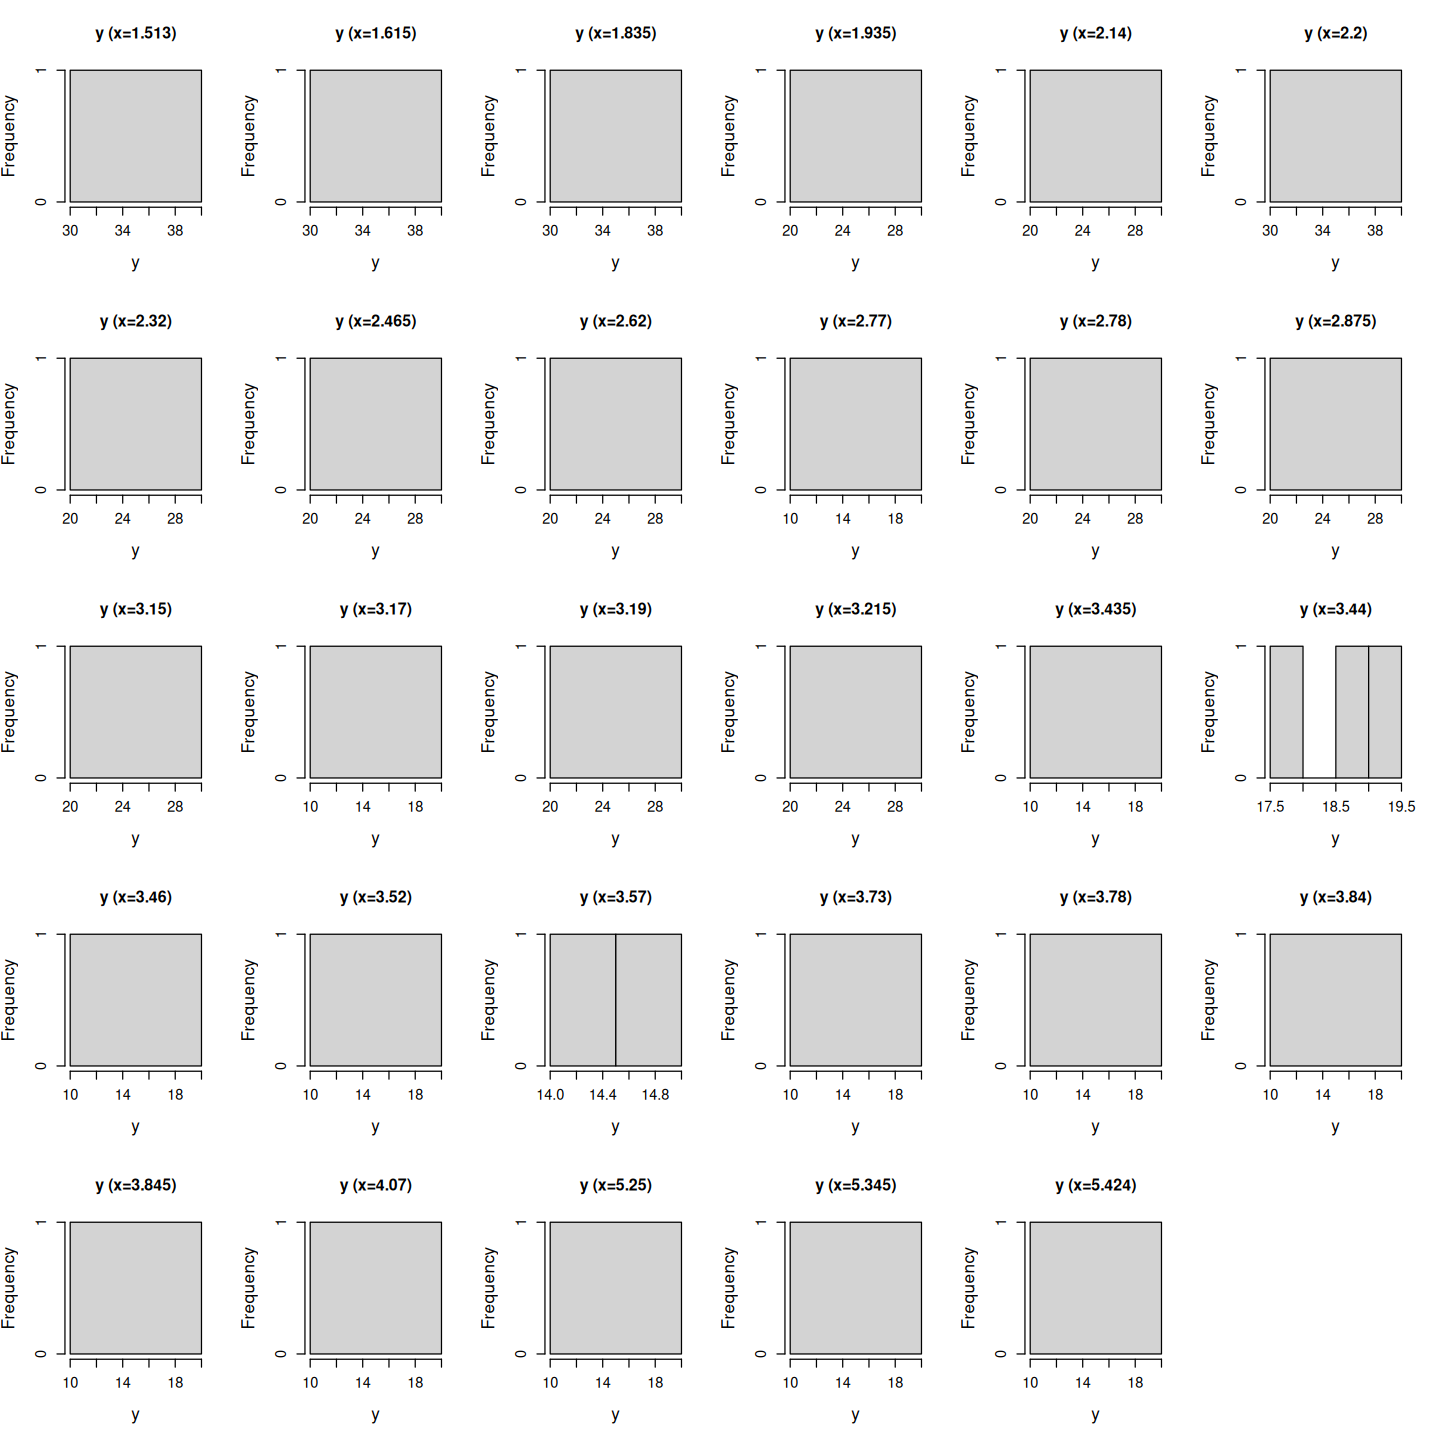

In [36]:
par(cex.lab=1.3, cex.axis=1.1, cex=1.4) # plot scaling
par(mfrow=c(5,6))
u.wt <- unique(mtcars$wt)
u.wt <- sort(u.wt)
for (i in 1:length(u.wt)){
    y <- mtcars$mpg[mtcars$wt == u.wt[i]]
    hist(y, main=paste0("y (x=", u.wt[i], ")"))
}

As expected, this is not very helpful. So how do we work with this assumption practically? Remembering that the alternative way of expressing the regression model is

$$
\begin{align*}
    y_{i}   &= \beta_{0} + \beta_{1}x_{i} + \epsilon_{i} \\
    \epsilon_{i} &\sim \mathcal{N}\left(0,\sigma^{2}\right),
\end{align*}
$$

notice that the distributions of the errors is *identical* across every error. Every error has a mean of 0 and a variance of $\sigma^{2}$. As such, every error is drawn from *the same distribution*. In other words, the errors together represents a *sample* from a single distribution. In statistical terminology we say that they are i.i.d. (*independent and identically distributed*). Because of this, we can collapse all the errors together and just look at *one distribution*.

As an example in `R`, we can use

In [37]:
options(repr.plot.width=12, repr.plot.height=7)

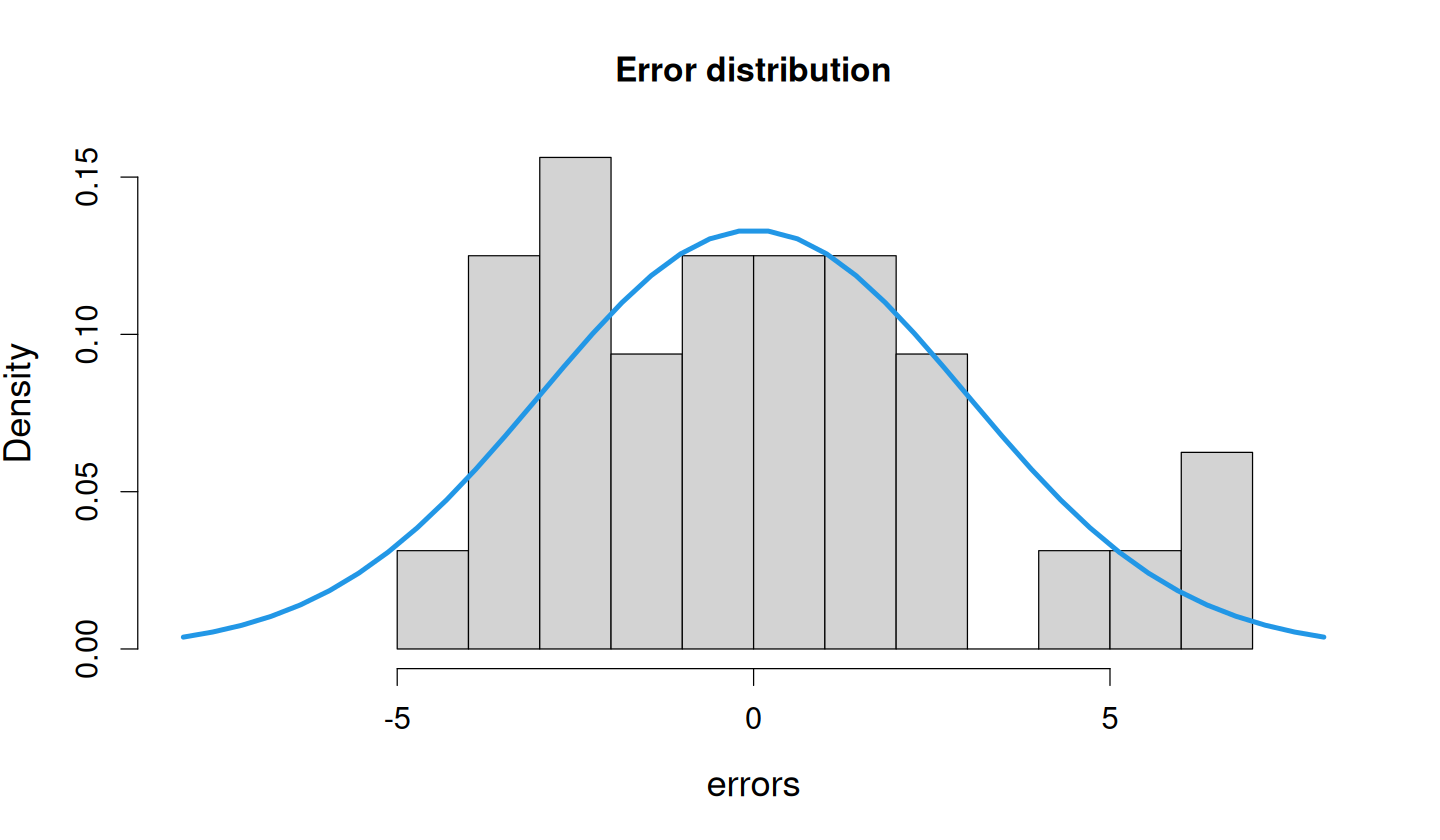

In [38]:
par(cex.lab=1.3, cex.axis=1.1, cex=1.4) # plot scaling

# Model and errors
reg.mod <- lm(mpg ~ wt, data=mtcars)
errors  <- resid(reg.mod)

# X-axis grid
x2 <- seq(-8, 8, length=40)

# Normal curve
norm.curve <- dnorm(x2, mean=0, sd=sd(errors))

# Histogram
hist(errors, prob=TRUE, breaks=10, main = "Error distribution", xlim=c(-8,8))

lines(x2, norm.curve, col=4, lwd=4) 
 


Again, do not worry about the syntax around actually doing this. We will get to that soon. Also, do not worry about the fact that this does not look all that convincingly normal. For the moment, just make sure you recognise that it is the *distribution of errors* that is of most interest here.



### (3) The relationship can be captured by a straight-line

### (4) The variance is constant

[^greekfoot]: Ifyou are not very comfortable with this, we would recommend spending some time learning the Greek alphabet. Not only will this help you get more used to the symbols being used, but will also help in terms of communication. You will not be able to verbalise anything about a model if you do not know how to pronounce the Greek alphabet. 